<a href="https://colab.research.google.com/github/turanmehdiyeva/classification-model/blob/main/CreditScoring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
import xgboost as xgb

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/CreditScoring.csv')
df.head()

,Status,Seniority,Home,Time,Age,Marital,Records,Job,Expenses,Income,Assets,Debt,Amount,Price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
df.columns = df.columns.str.lower()
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,1,9,1,60,30,2,1,3,73,129,0,0,800,846
1,1,17,1,60,58,3,1,1,48,131,0,0,1000,1658
2,2,10,2,36,46,2,2,3,90,200,3000,0,2000,2985
3,1,0,1,60,24,1,1,1,63,182,2500,0,900,1325
4,1,0,1,36,26,1,1,1,46,107,0,0,310,910


In [ ]:
status_values = {
    1:'ok',
    2:'default',
    0:'unk'
}

df.status = df.status.map(status_values)

home_values = {
    1:'rent',
    2:'owner',
    3:'private',
    4:'ignore',
    5:'parents',
    6:'other',
    0:'unk'
}

df.home = df.home.map(home_values)

martial_values = {
    1:'single',
    2:'married',
    3:'widow',
    4:'separated',
    5:'divorced',
    0:'unk'
}

df.marital = df.marital.map(martial_values)

record_values = {
    1:'no',
    2:'yes',
    0:'unk'
}

df.records = df.records.map(record_values)

job_values = {
    1:'fixed',
    2:'partime',
    3:'freelance',
    4:'others',
    0:'unk'
}

df.job = df.job.map(job_values)

In [ ]:
df.head()

,status,seniority,home,time,age,marital,records,job,expenses,income,assets,debt,amount,price
0,ok,9,rent,60,30,married,no,freelance,73,129,0,0,800,846
1,ok,17,rent,60,58,widow,no,fixed,48,131,0,0,1000,1658
2,default,10,owner,36,46,married,yes,freelance,90,200,3000,0,2000,2985
3,ok,0,rent,60,24,single,no,fixed,63,182,2500,0,900,1325
4,ok,0,rent,36,26,single,no,fixed,46,107,0,0,310,910


In [ ]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,763317.0,1060341.0,404382.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,8703625.0,10217569.0,6344253.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3500.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,166.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,99999999.0,99999999.0,99999999.0,5000.0,11140.0


In [ ]:
for c in ['income','assets','debt']:
    df[c] = df[c].replace(99999999.0, np.nan)

In [ ]:
df.describe().round()

,seniority,time,age,expenses,income,assets,debt,amount,price
count,4455.0,4455.0,4455.0,4455.0,4421.0,4408.0,4437.0,4455.0,4455.0
mean,8.0,46.0,37.0,56.0,131.0,5403.0,343.0,1039.0,1463.0
std,8.0,15.0,11.0,20.0,86.0,11573.0,1246.0,475.0,628.0
min,0.0,6.0,18.0,35.0,0.0,0.0,0.0,100.0,105.0
25%,2.0,36.0,28.0,35.0,80.0,0.0,0.0,700.0,1118.0
50%,5.0,48.0,36.0,51.0,120.0,3000.0,0.0,1000.0,1400.0
75%,12.0,60.0,45.0,72.0,165.0,6000.0,0.0,1300.0,1692.0
max,48.0,72.0,68.0,180.0,959.0,300000.0,30000.0,5000.0,11140.0


In [ ]:
df.status.value_counts()

ok         3200
default    1254
unk           1
Name: status, dtype: int64

In [ ]:
df = df[df.status != 'unk']

#### **Dataset preparation**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_full, test_X = train_test_split(df, test_size=0.2, random_state=1)
train_X, val_X = train_test_split(train_full, test_size=0.25, random_state=1)

In [ ]:
print(f'{len(train_X)}\n{len(val_X)}\n{len(test_X)}')

2672
891
891


In [ ]:
train_y = (train_X.status == 'default').values.reshape(-1,1)
val_y = (val_X.status == 'default').values.reshape(-1,1)

In [ ]:
del train_X['status']
del val_X['status']

In [ ]:
train_X = train_X.fillna(0)
val_X = val_X.fillna(0)

In [ ]:
dict_train = train_X.to_dict(orient='records')
dict_val = val_X.to_dict(orient='records')

In [ ]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)

X_train = dv.fit_transform(dict_train)
X_val = dv.transform(dict_val)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(train_y, y_pred)

1.0

In [ ]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.650482132728304

overfitting

In [ ]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.tree import export_text

tree_text = export_text(dt, feature_names=dv.feature_names_)
print(tree_text)

|--- income <= 89.50
|   |--- seniority <= 2.50
|   |   |--- class: True
|   |--- seniority >  2.50
|   |   |--- class: False
|--- income >  89.50
|   |--- records=no <= 0.50
|   |   |--- class: False
|   |--- records=no >  0.50
|   |   |--- class: False



In [ ]:
y_pred = dt.predict_proba(X_train)[:,1]
roc_auc_score(train_y, y_pred)

0.7295775678019526

In [ ]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.7108180500409655

In [ ]:
for depth in [1,2,3,4,5,6,10,15,20,None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, train_y)
    y_pred = dt.predict_proba(X_val)[:,1]
    auc = roc_auc_score(val_y, y_pred)
    print(f'{depth}-->{auc}')

1-->0.6159103800340329
2-->0.7108180500409655
3-->0.7519852524106636
4-->0.7728934266086847
5-->0.7654030377513077
6-->0.7373952227894371
10-->0.6572635028675868
15-->0.6417564757042918
20-->0.6495241696603011
None-->0.6497069389298543


In [ ]:
for m in [3,4,5]:
    print(f'depth: {m}')
    
    for s in [1,5,10,15,20,50,100,200]:
        dt=DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, train_y)
        y_pred = dt.predict_proba(X_val)[:,1]
        auc = roc_auc_score(val_y, y_pred)
        print(f'{s}-->{auc}')
        
    print()

depth: 3
1-->0.7519852524106636
5-->0.7519852524106636
10-->0.7519852524106636
15-->0.7519852524106636
20-->0.7519852524106636
50-->0.7519852524106636
100-->0.7509674166509107
200-->0.7484716707632193

depth: 4
1-->0.7728934266086847
5-->0.7769269553160648
10-->0.7775225310392638
15-->0.7771632948887629
20-->0.776662254994643
50-->0.7716329488876283
100-->0.7770309447280519
200-->0.7619650847671269

depth: 5
1-->0.7654030377513077
5-->0.7747809919959664
10-->0.776284111678326
15-->0.7796054704733094
20-->0.7786286002394908
50-->0.7803743618831537
100-->0.7741665091069515
200-->0.7619178168525872



In [ ]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)
dt.fit(X_train, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=50, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
y_pred = dt.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.7803743618831537

#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.7815150942207096

In [ ]:
rf = RandomForestClassifier(n_estimators=10, random_state=3)
rf.fit(X_train, train_y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=3, verbose=0,
                       warm_start=False)

In [ ]:
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.7867712863175144

In [ ]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=3)
    rf.fit(X_train, train_y)
    
    y_pred = rf.predict_proba(X_val)[:,1]
    auc = roc_auc_score(val_y, y_pred)
    print(f'{i}-->{auc}')
    
    aucs.append(auc)

10-->0.7867712863175144
20-->0.7908646877166445
30-->0.8008791832104367
40-->0.7996029495178673
50-->0.801982101216361
60-->0.8065355769836768
70-->0.8068633011911515
80-->0.812084830150627
90-->0.8133232495115649
100-->0.8138778597088296
110-->0.814867334719859
120-->0.8148358227768324
130-->0.8146435999243713
140-->0.812743429759879
150-->0.8129482573895507
160-->0.8130144324699061
170-->0.812743429759879
180-->0.8130175836642086
190-->0.8132507720426041
200-->0.8137833238797505


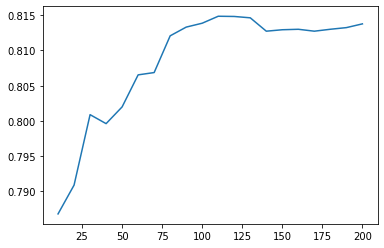

In [ ]:
plt.plot(range(10,201,10), aucs)
plt.show()

In [ ]:
all_aucs = {}

for depth in [5,10,20]:
    print(f'depth: {depth}')
    aucs = []
    
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=1)
        rf.fit(X_train, train_y)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(val_y, y_pred)
        print(f'{i}-->{auc}')
        aucs.append(auc)
        
    all_aucs[depth] = aucs
    print()

depth: 5
10-->0.8119083632696792
20-->0.8094315245478035
30-->0.8081710468267475
40-->0.8092708136383691
50-->0.8119493287956135
60-->0.8111867397743744
70-->0.81254175332451
80-->0.8126173819877733
90-->0.8143442364656204
100-->0.8147917060565953
110-->0.815478666414571
120-->0.8165500724774689
130-->0.8162286506585996
140-->0.8164870485914161
150-->0.8170857755089178
160-->0.8172874519442868
170-->0.8177349215352618
180-->0.8185731392197644
190-->0.8187937228209492
200-->0.8186172559400012

depth: 10
10-->0.7991334215667738
20-->0.8027446902376001
30-->0.806674229532993
40-->0.8082939434045504
50-->0.8119871431272453
60-->0.8132539232369067
70-->0.8142749101909624
80-->0.8138337429885927
90-->0.8139786979265141
100-->0.8149681729375433
110-->0.8154786664145711
120-->0.8152580828133863
130-->0.8170416587886807
140-->0.8171551017835761
150-->0.8176340833175775
160-->0.8182580197895002
170-->0.8185983487741855
180-->0.8191655637486608
190-->0.8183840675616059
200-->0.8183714627843953

d

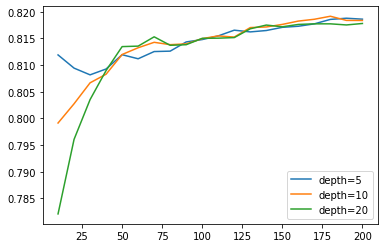

In [ ]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[5], label='depth=5')
plt.plot(num_trees, all_aucs[10], label='depth=10')
plt.plot(num_trees, all_aucs[20], label='depth=20')
plt.legend()
plt.show()

In [ ]:
all_aucs = {}

for m in [3,5,10]:
    print(f'min_samples_leaf: {m}')
    aucs = []
    
    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=10, min_samples_leaf=m, random_state=1)
        rf.fit(X_train, train_y)
        y_pred = rf.predict_proba(X_val)[:,1]
        auc = roc_auc_score(val_y, y_pred)
        print(f'{i}-->{auc}')
        aucs.append(auc)
        
    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10-->0.8045251150185921
20-->0.8086405747778408
30-->0.8120690741791139
40-->0.8169408205709965
50-->0.8174828259910506
60-->0.817602571374551
70-->0.8194617760131089
80-->0.8211066994390873
90-->0.82116972332514
100-->0.8218377765173001
110-->0.8217621478540367
120-->0.8227138085334342
130-->0.8226759942018024
140-->0.823804121762148
150-->0.8246486418352555
160-->0.8243461271822021
170-->0.8238545408709901
180-->0.8237789122077268
190-->0.8229848112434612
200-->0.822890275414382

min_samples_leaf: 5
10-->0.8144387722946997
20-->0.8180059242452891
30-->0.8232369067876726
40-->0.8233062330623306
50-->0.822909182580198
60-->0.823539421440726
70-->0.8226003655385392
80-->0.8224806201550388
90-->0.8217747526312472
100-->0.8218251717400894
110-->0.8217558454654315
120-->0.8218629860717213
130-->0.8222915484968802
140-->0.8220772672843008
150-->0.8220331505640638
160-->0.8220961744501166
170-->0.8216613096363523
180-->0.8215604714186677
190-->0.8215730761958783
200-->0.8

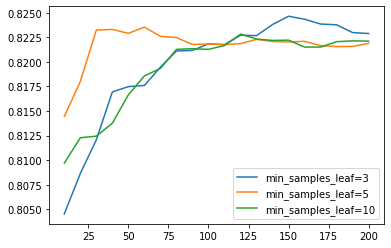

In [ ]:
num_trees = list(range(10,201,10))
plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10')
plt.legend()
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=10, min_samples_leaf=3, random_state=1)
rf.fit(X_train, train_y)
y_pred = rf.predict_proba(X_val)[:,1]
roc_auc_score(val_y, y_pred)

0.8246486418352555

#### **Gradient Boosting**

In [ ]:
dtrain = xgb.DMatrix(X_train, label=train_y, feature_names=dv.feature_names_)

In [ ]:
dval = xgb.DMatrix(X_val, label=val_y, feature_names=dv.feature_names_)

In [ ]:
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,

    'objective':'binary:logistic',
    'nthread':8,
    'seed':1,
    'silent':1
}

In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)

In [ ]:
y_pred = model.predict(dval)

In [ ]:
roc_auc_score(val_y, y_pred)

0.8143788996029495

In [ ]:
watchlist = [(dtrain, 'train'), (dval,'val')]

In [ ]:
xgb_params = {
    'eta':0.3,
    'max_depth':6,
    'min_child_weight':1,

    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'silent':1
}

In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=100, evals=watchlist, verbose_eval=10)

[0]	train-auc:0.866153	val-auc:0.767685
[10]	train-auc:0.955618	val-auc:0.812715
[20]	train-auc:0.977559	val-auc:0.816317
[30]	train-auc:0.986453	val-auc:0.814622
[40]	train-auc:0.994019	val-auc:0.811212
[50]	train-auc:0.998121	val-auc:0.80612
[60]	train-auc:0.999112	val-auc:0.803372
[70]	train-auc:0.999551	val-auc:0.80583
[80]	train-auc:0.999923	val-auc:0.804267
[90]	train-auc:0.999984	val-auc:0.803031
[99]	train-auc:0.999991	val-auc:0.803309


overfitting

In [ ]:
xgb_params = {
    'eta':0.1,
    'max_depth':6,
    'min_child_weight':1,

    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'silent':1
}

In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=500, verbose_eval=10, evals=watchlist)

[0]	train-auc:0.866153	val-auc:0.767685
[10]	train-auc:0.923593	val-auc:0.801012
[20]	train-auc:0.943055	val-auc:0.813966
[30]	train-auc:0.95758	val-auc:0.818532
[40]	train-auc:0.965404	val-auc:0.822878
[50]	train-auc:0.971572	val-auc:0.823439
[60]	train-auc:0.976457	val-auc:0.823936
[70]	train-auc:0.980851	val-auc:0.82405
[80]	train-auc:0.984962	val-auc:0.823571
[90]	train-auc:0.987909	val-auc:0.821913
[100]	train-auc:0.989688	val-auc:0.822115
[110]	train-auc:0.991342	val-auc:0.821044
[120]	train-auc:0.993427	val-auc:0.82221
[130]	train-auc:0.99463	val-auc:0.821895
[140]	train-auc:0.995819	val-auc:0.821075
[150]	train-auc:0.996792	val-auc:0.820413
[160]	train-auc:0.997474	val-auc:0.820445
[170]	train-auc:0.997958	val-auc:0.81955
[180]	train-auc:0.998307	val-auc:0.818762
[190]	train-auc:0.998663	val-auc:0.819418
[200]	train-auc:0.99886	val-auc:0.819336
[210]	train-auc:0.999067	val-auc:0.819096
[220]	train-auc:0.99932	val-auc:0.819298
[230]	train-auc:0.999509	val-auc:0.818977
[240]	trai

In [ ]:
xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,

    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'silent':1
}

In [ ]:
model = xgb.train(xgb_params, dtrain, num_boost_round=500, verbose_eval=10, evals=watchlist)

[0]	train-auc:0.776974	val-auc:0.751985
[10]	train-auc:0.844475	val-auc:0.801342
[20]	train-auc:0.866013	val-auc:0.812822
[30]	train-auc:0.880851	val-auc:0.819162
[40]	train-auc:0.889441	val-auc:0.822528
[50]	train-auc:0.896588	val-auc:0.826284
[60]	train-auc:0.901936	val-auc:0.829464
[70]	train-auc:0.905954	val-auc:0.831083
[80]	train-auc:0.909604	val-auc:0.831972
[90]	train-auc:0.912701	val-auc:0.831625
[100]	train-auc:0.915312	val-auc:0.83206
[110]	train-auc:0.918041	val-auc:0.833327
[120]	train-auc:0.92017	val-auc:0.832905
[130]	train-auc:0.922977	val-auc:0.833648
[140]	train-auc:0.924937	val-auc:0.833352
[150]	train-auc:0.927336	val-auc:0.83264
[160]	train-auc:0.92944	val-auc:0.832073
[170]	train-auc:0.931873	val-auc:0.832136
[180]	train-auc:0.93357	val-auc:0.831915
[190]	train-auc:0.935905	val-auc:0.831291
[200]	train-auc:0.937272	val-auc:0.83092
[210]	train-auc:0.939048	val-auc:0.831317
[220]	train-auc:0.94087	val-auc:0.831172
[230]	train-auc:0.94243	val-auc:0.830579
[240]	train

#### **Testing the final model**

In [ ]:
y_train = (train_full['status']=='default').values.reshape(-1,1)

In [ ]:
y_test = (test_X['status']=='default').values.reshape(-1,1)

In [ ]:
del train_full['status']
del test_X['status']

In [ ]:
dict_train = train_full.fillna(0).to_dict(orient='records')
dict_test = test_X.fillna(0).to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dict_train)
X_test = dv.transform(dict_test)

In [ ]:
print(f'{len(X_train[0])}\n{len(X_test[0])}')

29
29


In [ ]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta':0.1,
    'max_depth':3,
    'min_child_weight':1,

    'objective':'binary:logistic',
    'eval_metric':'auc',
    'nthread':8,
    'seed':1,
    'silent':1
}

num_trees = 130

model = xgb.train(xgb_params, dtrain, num_boost_round=num_trees)

In [ ]:
y_pred_xgb = model.predict(dtest)
roc_auc_score(y_test, y_pred_xgb)

0.8217831973069192